Classificação de Texto Multilabel


José Augusto de Almeida Neto


## Importar bibliotecas


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carregar datasets


In [2]:
# Carregar dataset
name = 'teste2'
df_case_study = pd.read_csv(f'../datasets/dataset-case_study-{name}.csv')
df_predictions = pd.read_csv(f'../datasets/dataset-case_study_predictions-{name}.csv')

In [3]:
df_results = df_case_study.join(df_predictions.astype(int))
df_results

,restaurante_name,user_name,review_date,stars,comment_text,year,platform,language,comment_text_translated,ambiente,bebida,comida,geral,localização,outros,preço,serviço
0,cipriani,Viva Gastronomia,9 anos atrás no Zomato,1,Hotelaria e gastronomia são duas artes demand...,2015,Zomato,pt,hotelaria e gastronomia são dua art demandam m...,0,0,1,0,0,0,0,0
1,cipriani,Viva Gastronomia,9 anos atrás no Zomato,1,Hotelaria e gastronomia são duas artes demand...,2015,Zomato,pt,o hotel copacabana palac é uma referência para...,0,1,1,0,0,0,0,0
2,cipriani,Viva Gastronomia,9 anos atrás no Zomato,1,Hotelaria e gastronomia são duas artes demand...,2015,Zomato,pt,"à part da ambientação , as opçõ gastronômica c...",0,1,0,0,0,0,0,0
3,cipriani,Viva Gastronomia,9 anos atrás no Zomato,1,Hotelaria e gastronomia são duas artes demand...,2015,Zomato,pt,o carpaccio cipriani é um item no qual erro nã...,0,0,0,0,0,0,0,1
4,cipriani,Viva Gastronomia,9 anos atrás no Zomato,1,Hotelaria e gastronomia são duas artes demand...,2015,Zomato,pt,o couvert entrega variedad de pãe e molho que ...,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13728,tangara,Maria Lins,4 anos atrás no Google,1,Comida divina,2020,Google,it,comida divina,0,0,1,1,0,0,0,1
13729,tangara,Ricardo Polisel Alves,5 anos atrás no Foursquare,0,Tasting Menu was indeed very good. Service wa...,2019,Foursquare,en,o menu de degustação foi realment muito bom,0,0,0,1,0,0,0,1
13730,tangara,Ricardo Polisel Alves,5 anos atrás no Foursquare,0,Tasting Menu was indeed very good. Service wa...,2019,Foursquare,en,"os vinho começam acima de r $ 250 , ma , no en...",0,0,0,0,0,0,0,1
13731,tangara,Ricardo Polisel Alves,5 anos atrás no Foursquare,0,Tasting Menu was indeed very good. Service wa...,2019,Foursquare,en,o ambient era aconchegant e as mesa estavam ad...,0,0,1,0,0,0,0,0


## Análise dos resultados

In [4]:
labels = ['ambiente', 'bebida', 'comida', 'geral',
          'localização', 'outros', 'preço', 'serviço']

# Obter número de comentários que não foram classificados
not_classified = df_results[df_results[labels].eq(0).all(axis=1)]
print('Total de comentários não classificados:', len(not_classified))

Total de comentários não classificados: 270


In [5]:
unique_platforms = df_results['platform'].value_counts()
unique_platforms_df = unique_platforms.reset_index()
unique_platforms_df.columns = ['Platform', 'Count']

# Remover linhas de "Restaurant Guru" devido ao seu baixíssimo número de ocorrências
df_results = df_results[df_results['platform'] != 'Restaurant Guru']
df_results.reset_index(drop=True, inplace=True)

unique_platforms_df

,Platform,Count
0,Google,8322
1,Yelp,2345
2,Facebook,1559
3,Foursquare,1368
4,Zomato,124
5,Restaurant Guru,15


### Plataformas

In [6]:
# Agrupar por plataforma
df_platforms = df_results.groupby('platform')[labels].sum()

# Criar coluna com o tema mais repetido
max_col = df_platforms.iloc[:, 1:].idxmax(axis=1)
df_platforms['tema_mais_repetido'] = max_col

# Criar coluna com número total de temas por plataforma
df_platforms['total_temas'] = df_platforms[labels].sum(axis=1)

# Ordenar restaurantes por quantidades de temas assinalados
df_platforms = df_platforms.sort_values(by='total_temas', ascending=False)
df_platforms.reset_index(inplace=True)

df_platforms

,platform,ambiente,bebida,comida,geral,localização,outros,preço,serviço,tema_mais_repetido,total_temas
0,Google,889,477,4266,1763,67,1241,725,1921,comida,11349
1,Yelp,236,129,1263,496,17,336,219,530,comida,3226
2,Facebook,172,99,794,318,14,236,132,356,comida,2121
3,Foursquare,160,74,687,283,14,230,121,325,comida,1894
4,Zomato,11,9,65,27,0,17,15,28,comida,172


In [7]:
# Substituir valores por valores em porcentagem
total = df_platforms['total_temas']
df_platforms_porcent = df_platforms.copy()
df_platforms_porcent[labels] = df_platforms_porcent[labels].apply(lambda x: x/total).applymap(lambda x: "{:.2%}".format(x) if isinstance(x, (int, float)) and x > 0 else x)

# Remover colunas extras
df_platforms_porcent = df_platforms_porcent.drop(['tema_mais_repetido'], axis=1).drop(['total_temas'], axis=1)

# Converter as porcentagens para tipo numérico
df_grafico = df_platforms_porcent.copy()
df_grafico[labels] = df_grafico[labels].apply(lambda x: x.str.rstrip('%').astype(float))

# Substituir NaN por 0
df_grafico = df_grafico.fillna(0)

df_platforms_porcent

C:\Users\José Neto\AppData\Local\Temp\ipykernel_29300\1010676932.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_platforms_porcent[labels] = df_platforms_porcent[labels].apply(lambda x: x/total).applymap(lambda x: "{:.2%}".format(x) if isinstance(x, (int, float)) and x > 0 else x)


,platform,ambiente,bebida,comida,geral,localização,outros,preço,serviço
0,Google,7.83%,4.20%,37.59%,15.53%,0.59%,10.93%,6.39%,16.93%
1,Yelp,7.32%,4.00%,39.15%,15.38%,0.53%,10.42%,6.79%,16.43%
2,Facebook,8.11%,4.67%,37.44%,14.99%,0.66%,11.13%,6.22%,16.78%
3,Foursquare,8.45%,3.91%,36.27%,14.94%,0.74%,12.14%,6.39%,17.16%
4,Zomato,6.40%,5.23%,37.79%,15.70%,0.0,9.88%,8.72%,16.28%


C:\Users\José Neto\AppData\Local\Temp\ipykernel_29300\3684012981.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])


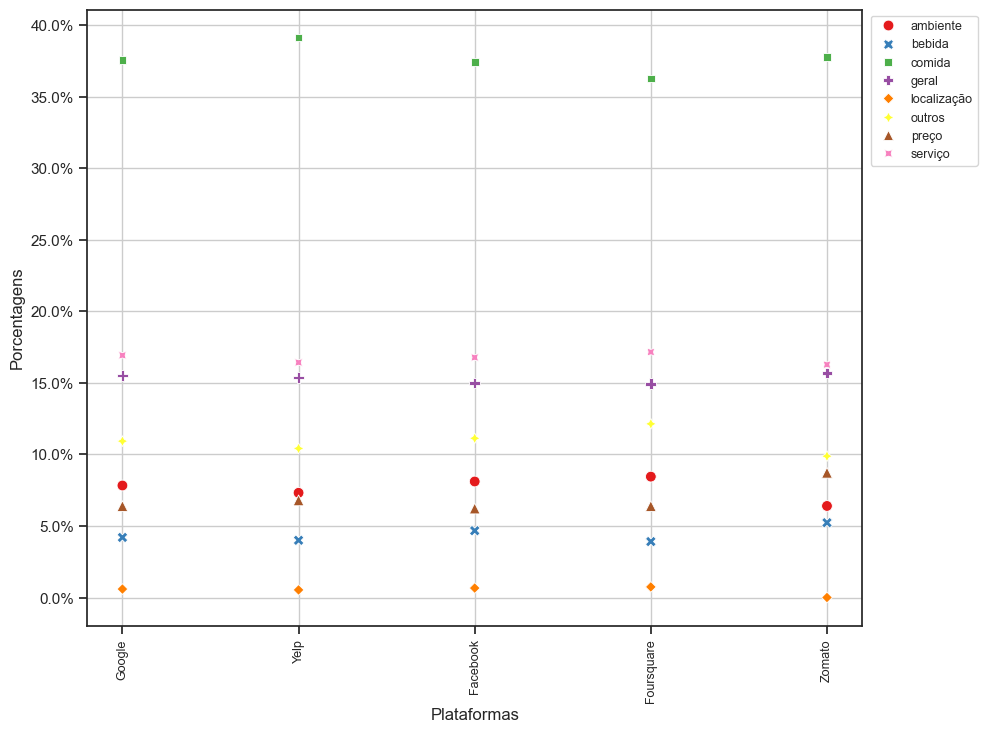

In [8]:
# Configurar o estilo do Seaborn
sns.set(style='ticks')

# Criar uma nova figura com um tamanho maior
plt.figure(figsize=(10, 8))  # Ajuste as dimensões conforme necessário

# Plotar o gráfico de dispersão
sns.scatterplot(data=df_grafico[labels], palette='Set1', s=60)

# Configurar os rótulos dos eixos
plt.xlabel('Plataformas') 
plt.ylabel('Porcentagens')
plt.xticks(range(len(df_grafico)), df_grafico['platform'], rotation=90, fontsize=9)
# Adicionar o símbolo de porcentagem aos valores do eixo y
plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])

# Adicionar uma grade
plt.grid(True)

# Mover a legenda para a parte superior
plt.legend(loc='upper center', bbox_to_anchor=(1.08, 1), ncol=1, fontsize=9)

# Mostrar o gráfico
plt.show()

<Figure size 1200x800 with 0 Axes>

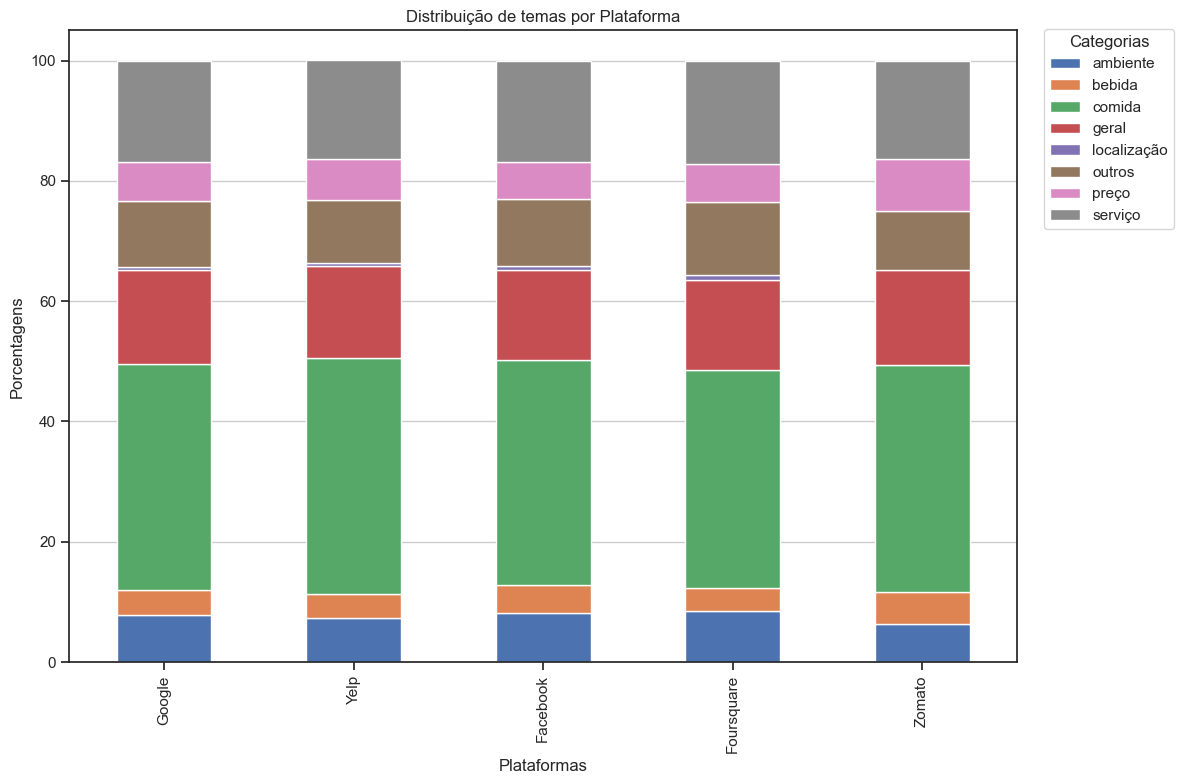

In [9]:
# Criar uma nova figura
plt.figure(figsize=(12, 8))

# Plotar gráfico de barras empilhadas
df_grafico.set_index('platform')[labels].plot(kind='bar', stacked=True, figsize=(12, 8))

# Configurar os rótulos dos eixos
plt.xlabel('Plataformas')
plt.ylabel('Porcentagens')
plt.title('Distribuição de temas por Plataforma')

# Adicionar legenda
plt.legend(title='Categorias', bbox_to_anchor=(1.02, 1.015), loc='upper left')

# Adicionar uma grade
plt.grid(True, axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Restaurantes

In [10]:
# Agrupar por nome do restaurante
df_restaurants = df_results.groupby('restaurante_name')[labels].sum()

# Criar coluna com o tema mais repetido
max_col = df_restaurants.iloc[:, 1:].idxmax(axis=1)
df_restaurants['tema_mais_repetido'] = max_col

# Criar coluna com número total de temas por restaurante
df_restaurants['total_temas'] = df_restaurants[labels].sum(axis=1)

# Ordenar restaurantes por quantidades de temas assinalados
df_restaurants = df_restaurants.sort_values(by='total_temas', ascending=False)
df_restaurants.reset_index(inplace=True)

df_restaurants

,restaurante_name,ambiente,bebida,comida,geral,localização,outros,preço,serviço,tema_mais_repetido,total_temas
0,dom,315,169,1539,629,24,457,283,688,comida,4104
1,mani,162,70,730,293,13,186,111,343,comida,1908
2,kinoshita,144,84,725,295,12,209,113,303,comida,1885
3,lasai,97,65,474,211,6,144,82,211,comida,1290
4,evvai,92,58,419,178,7,120,76,207,comida,1157
5,sakamoto,85,57,407,167,7,122,81,175,comida,1101
6,picchi,79,39,406,187,10,115,82,179,comida,1097
7,huto,80,35,402,181,7,134,64,178,comida,1081
8,mee,83,37,418,166,6,113,65,180,comida,1068
9,tuju,72,47,359,125,4,98,49,158,comida,912


In [11]:
# Substituir valores por valores em porcentagem
total = df_restaurants['total_temas']
df_restaurants_porcent = df_restaurants.copy()
df_restaurants_porcent[labels] = df_restaurants_porcent[labels].apply(lambda x: x/total).applymap(lambda x: "{:.2%}".format(x) if isinstance(x, (int, float)) and x > 0 else x)

# Remover colunas extras
df_restaurants_porcent = df_restaurants_porcent.drop(['tema_mais_repetido'], axis=1).drop(['total_temas'], axis=1)

# Converter as porcentagens para tipo numérico
df_grafico = df_restaurants_porcent.copy()
df_grafico[labels] = df_grafico[labels].apply(lambda x: x.str.rstrip('%').astype(float))

# Substituir NaN por 0
df_grafico = df_grafico.fillna(0)

df_restaurants_porcent

C:\Users\José Neto\AppData\Local\Temp\ipykernel_29300\17619920.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_restaurants_porcent[labels] = df_restaurants_porcent[labels].apply(lambda x: x/total).applymap(lambda x: "{:.2%}".format(x) if isinstance(x, (int, float)) and x > 0 else x)


,restaurante_name,ambiente,bebida,comida,geral,localização,outros,preço,serviço
0,dom,7.68%,4.12%,37.50%,15.33%,0.58%,11.14%,6.90%,16.76%
1,mani,8.49%,3.67%,38.26%,15.36%,0.68%,9.75%,5.82%,17.98%
2,kinoshita,7.64%,4.46%,38.46%,15.65%,0.64%,11.09%,5.99%,16.07%
3,lasai,7.52%,5.04%,36.74%,16.36%,0.47%,11.16%,6.36%,16.36%
4,evvai,7.95%,5.01%,36.21%,15.38%,0.61%,10.37%,6.57%,17.89%
5,sakamoto,7.72%,5.18%,36.97%,15.17%,0.64%,11.08%,7.36%,15.89%
6,picchi,7.20%,3.56%,37.01%,17.05%,0.91%,10.48%,7.47%,16.32%
7,huto,7.40%,3.24%,37.19%,16.74%,0.65%,12.40%,5.92%,16.47%
8,mee,7.77%,3.46%,39.14%,15.54%,0.56%,10.58%,6.09%,16.85%
9,tuju,7.89%,5.15%,39.36%,13.71%,0.44%,10.75%,5.37%,17.32%


C:\Users\José Neto\AppData\Local\Temp\ipykernel_29300\718967272.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])


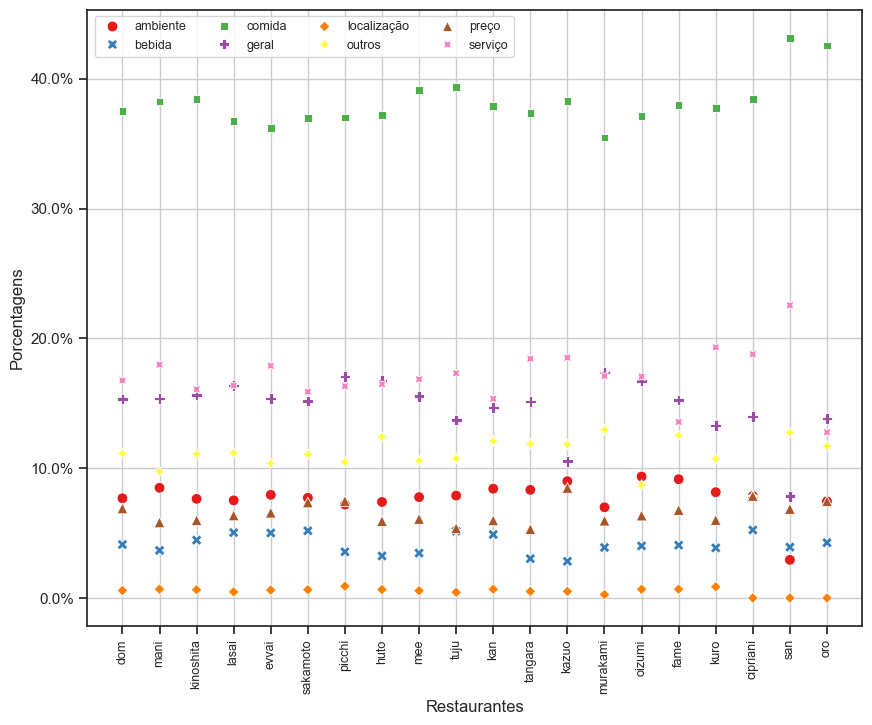

In [12]:
# Configurar o estilo do Seaborn
sns.set(style='ticks')

# Criar uma nova figura com um tamanho maior
plt.figure(figsize=(10, 8))  # Ajuste as dimensões conforme necessário

# Plotar o gráfico de dispersão
sns.scatterplot(data=df_grafico[labels], palette='Set1', s=60)

# Configurar os rótulos dos eixos
plt.xlabel('Restaurantes') 
plt.ylabel('Porcentagens')
plt.xticks(range(len(df_grafico)), df_grafico['restaurante_name'], rotation=90, fontsize=9)
# Adicionar o símbolo de porcentagem aos valores do eixo y
plt.gca().set_yticklabels([str(label) + '%' for label in plt.gca().get_yticks()])

# Adicionar uma grade
plt.grid(True)

# Mover a legenda para a parte superior
plt.legend(loc='upper center', bbox_to_anchor=(0.28, 1), ncol=4, fontsize=9)

# Mostrar o gráfico
plt.show()

<Figure size 1200x800 with 0 Axes>

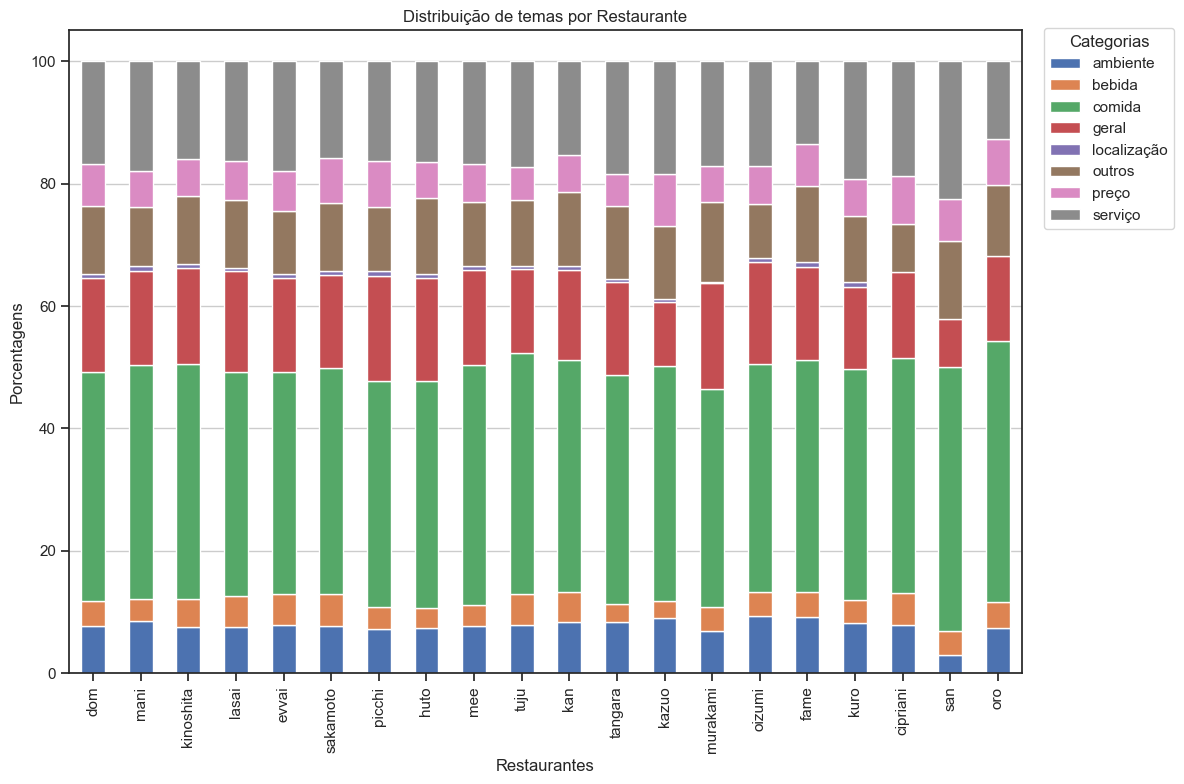

In [13]:
# Criar uma nova figura
plt.figure(figsize=(12, 8))

# Plotar gráfico de barras empilhadas
df_grafico.set_index('restaurante_name')[labels].plot(kind='bar', stacked=True, figsize=(12, 8))

# Configurar os rótulos dos eixos
plt.xlabel('Restaurantes')
plt.ylabel('Porcentagens')
plt.title('Distribuição de temas por Restaurante')

# Adicionar legenda
plt.legend(title='Categorias', bbox_to_anchor=(1.015, 1.015), loc='upper left')

# Adicionar uma grade
plt.grid(True, axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Restaurantes específicos

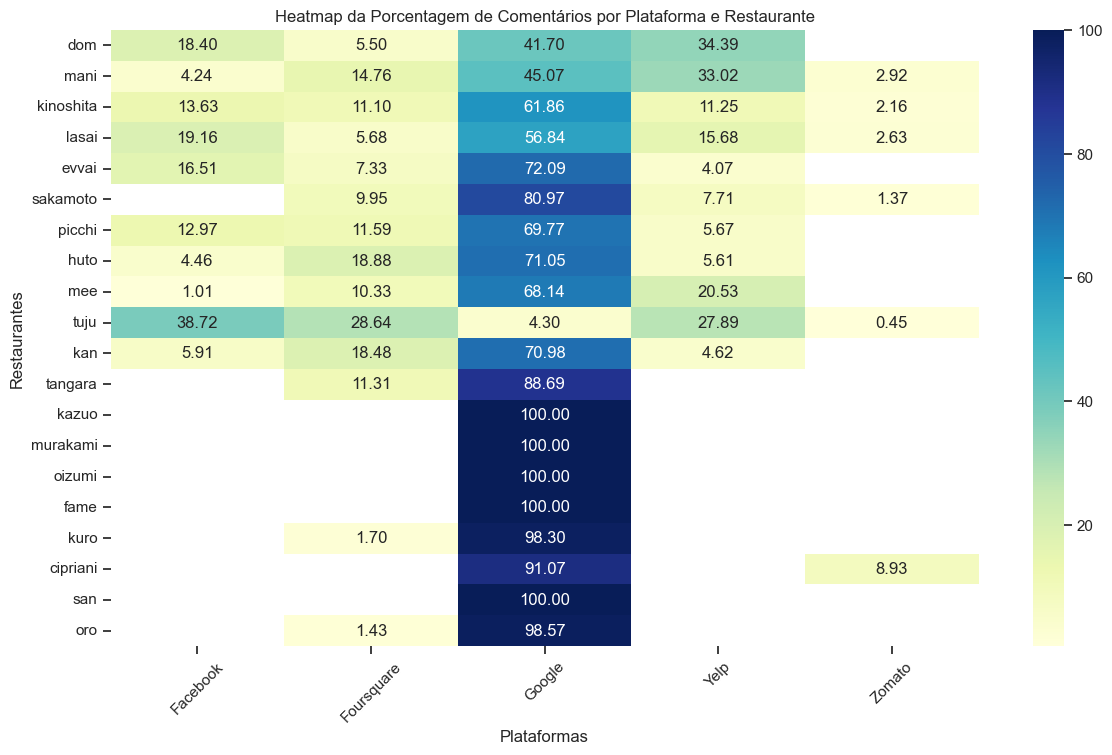

In [14]:
# Agrupar por nome do restaurante e plataforma, contando as ocorrências
df_platform_counts = df_results.groupby(['restaurante_name', 'platform']).size().unstack(fill_value=0).reset_index()

# Juntar o resultado com df_restaurants
df_plat_rest = df_restaurants_porcent.merge(df_platform_counts, on='restaurante_name', how='left')

# Substituir valores por valores em porcentagem
platforms = ['Facebook', 'Foursquare', 'Google', 'Yelp', 'Zomato']
df_plat_rest['total_ocorrencias'] = df_plat_rest[platforms].sum(axis=1)
df_plat_rest[platforms] = df_plat_rest[platforms].div(df_plat_rest['total_ocorrencias'], axis=0).map(lambda x: "{:.2%}".format(x) if x > 0 else x)
df_plat_rest = df_plat_rest.drop(['total_ocorrencias'], axis=1)

# Convertendo porcentagens para números decimais para plotagem
df_plat_rest_numeric = df_plat_rest.copy()
df_plat_rest_numeric[platforms] = df_plat_rest[platforms].apply(lambda x: x.str.rstrip('%').astype(float))

# Plotando o heatmap das porcentagens de plataformas por restaurante
plt.figure(figsize=(14, 8))
sns.heatmap(df_plat_rest_numeric.set_index('restaurante_name')[platforms], annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Heatmap da Porcentagem de Comentários por Plataforma e Restaurante')
plt.xlabel('Plataformas')
plt.ylabel('Restaurantes')
plt.xticks(rotation=45)
plt.show()

C:\Users\José Neto\AppData\Local\Temp\ipykernel_29300\711081985.py:74: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


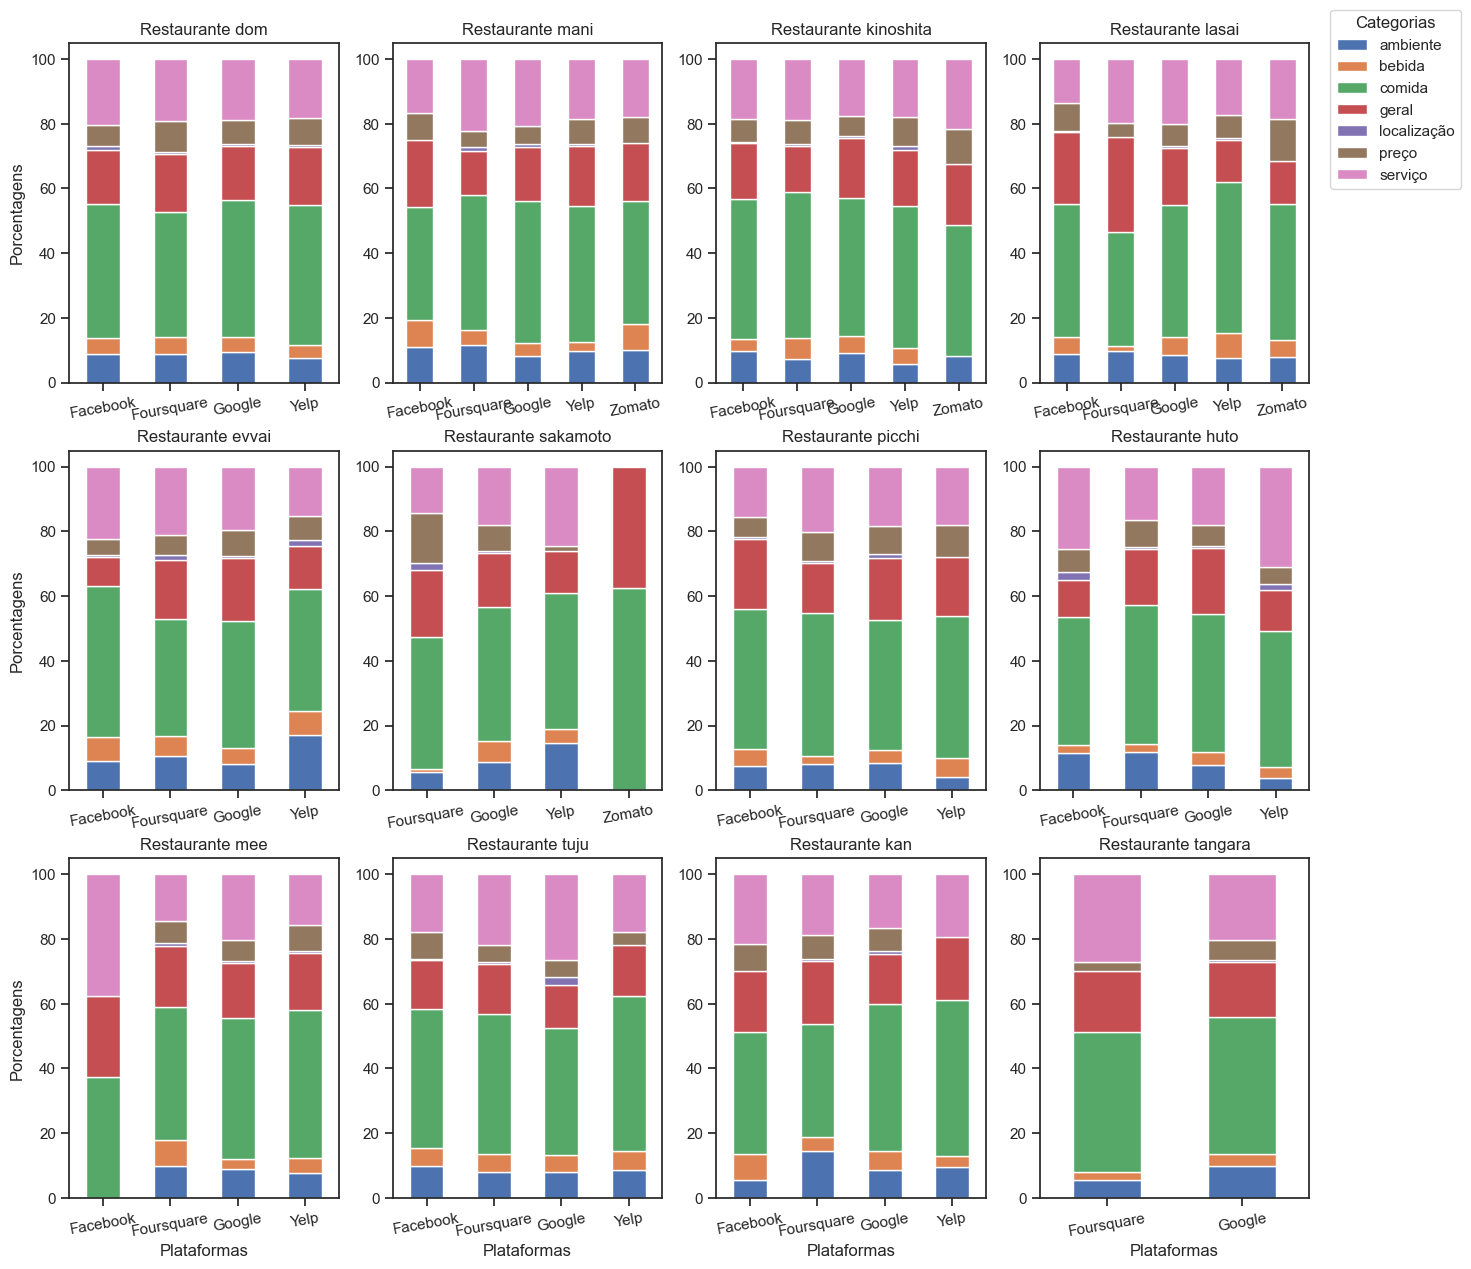

In [15]:
restaurants = ['dom', 'mani', 'kinoshita', 'lasai', 'evvai', 'sakamoto',
               'picchi', 'huto', 'mee', 'tuju', 'kan', 'tangara']

temas = ['ambiente', 'bebida', 'comida', 'geral',
          'localização', 'preço', 'serviço']

# Definir o tamanho da figura
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 25))  # Ajuste as dimensões conforme necessário

# Achatar os eixos para fácil iteração
axes = axes.flatten()

# Iterar sobre cada restaurante e criar um gráfico
for i, rest in enumerate(restaurants):
    # Filtrar dados pelo restaurante
    df_rest = df_results[df_results['restaurante_name'] == rest]

    # Agrupar por 'platform' e somar os temas
    df_plat_rest = df_rest.groupby('platform')[temas].sum()

    # Adicionar coluna com o número total de temas
    df_plat_rest['total_temas'] = df_plat_rest.sum(axis=1)

    # Filtrar plataformas
    porcent_limite_plataforma = 1

    # Obter o num e porcentagens de comentários da plataformas por restaurante
    df_platform_counts = (df_rest.groupby(['restaurante_name', 'platform'])
                        .size()
                        .unstack(fill_value=0)
                        .stack()
                        .reset_index(level=1, name='total_comentarios')
                        .rename_axis(index='restaurante_name')
                        .reset_index(drop=True))
    total_geral = df_platform_counts['total_comentarios'].sum()
    df_platform_counts['total_comentarios_porcentagem'] = (df_platform_counts['total_comentarios'] / total_geral * 100).round(2)

    # Realizar o merge com df_plat_rest e filtrar plataformas
    df_plat_rest = df_plat_rest.merge(df_platform_counts, on='platform')
    df_plat_rest = df_plat_rest[df_plat_rest['total_comentarios_porcentagem'] >= porcent_limite_plataforma]
    df_plat_rest = df_plat_rest.drop(['total_comentarios_porcentagem', 'total_comentarios'], axis=1)
    df_plat_rest = df_plat_rest.set_index('platform')

    # Calcular porcentagens
    df_plat_rest_porcent = df_plat_rest.div(df_plat_rest['total_temas'], axis=0)
    df_plat_rest_porcent = df_plat_rest_porcent.map(lambda x: f"{x:.2%}" if x > 0 else x)

    # Preservar a coluna 'platform' antes de resetar o índice
    df_plat_rest_porcent.reset_index(inplace=True)

    # Remover colunas desnecessárias e converter porcentagens para tipo numérico
    df_grafico_rest = df_plat_rest_porcent.drop(['total_temas'], axis=1)
    df_grafico_rest[temas] = df_grafico_rest[temas].map(lambda x: str(x).rstrip('%')).astype(float).fillna(0)

    # Gráfico Barras
    df_grafico_rest.set_index('platform')[temas].plot(kind='bar', stacked=True, ax=axes[i], figsize=(16, 15))
    if i > 7:
        axes[i].set_xlabel('Plataformas')
    else:
        axes[i].set_xlabel(None)
    if i in [0, 4, 8]:
        axes[i].set_ylabel('Porcentagens')
    else:
        axes[i].set_ylabel('')
    axes[i].set_title(f'Restaurante {rest}')
    axes[i].legend_.remove()
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=10)  


# Adicionar uma única legenda fora dos gráficos
plt.legend(title='Categorias', bbox_to_anchor=(1.05, 3.52), loc='upper left')

# Ajustar layout
plt.tight_layout()
plt.show()

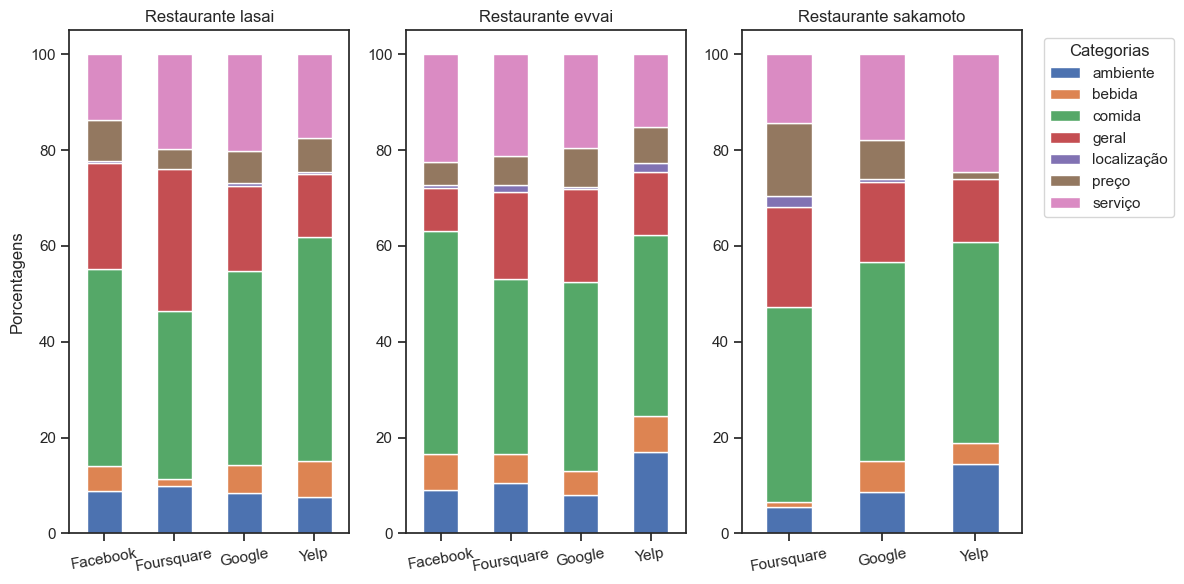

In [16]:
if name == 'teste1':
    restaurants = ['lasai', 'mani', 'mee']
else:
    restaurants = ['lasai', 'evvai', 'sakamoto']

# Definir o tamanho da figura
fig, axes = plt.subplots(nrows=1, ncols=3)  # Ajuste as dimensões conforme necessário

# Achatar os eixos para fácil iteração
axes = axes.flatten()

# Iterar sobre cada restaurante e criar um gráfico
for i, rest in enumerate(restaurants):
    # Filtrar dados pelo restaurante
    df_rest = df_results[df_results['restaurante_name'] == rest]

    # Agrupar por 'platform' e somar os temas
    df_plat_rest = df_rest.groupby('platform')[temas].sum()

    # Adicionar coluna com o número total de temas
    df_plat_rest['total_temas'] = df_plat_rest.sum(axis=1)

    # Filtrar plataformas
    porcent_limite_plataforma = 3

    # Obter o num e porcentagens de comentários da plataformas por restaurante
    df_platform_counts = (df_rest.groupby(['restaurante_name', 'platform'])
                        .size()
                        .unstack(fill_value=0)
                        .stack()
                        .reset_index(level=1, name='total_comentarios')
                        .rename_axis(index='restaurante_name')
                        .reset_index(drop=True))
    total_geral = df_platform_counts['total_comentarios'].sum()
    df_platform_counts['total_comentarios_porcentagem'] = (df_platform_counts['total_comentarios'] / total_geral * 100).round(2)

    # Realizar o merge com df_plat_rest e filtrar plataformas
    df_plat_rest = df_plat_rest.merge(df_platform_counts, on='platform')
    df_plat_rest = df_plat_rest[df_plat_rest['total_comentarios_porcentagem'] >= porcent_limite_plataforma]
    df_plat_rest = df_plat_rest.drop(['total_comentarios_porcentagem', 'total_comentarios'], axis=1)
    df_plat_rest = df_plat_rest.set_index('platform')

    # Calcular porcentagens
    df_plat_rest_porcent = df_plat_rest.div(df_plat_rest['total_temas'], axis=0)
    df_plat_rest_porcent = df_plat_rest_porcent.map(lambda x: f"{x:.2%}" if x > 0 else x)

    # Preservar a coluna 'platform' antes de resetar o índice
    df_plat_rest_porcent.reset_index(inplace=True)

    # Remover colunas desnecessárias e converter porcentagens para tipo numérico
    df_grafico_rest = df_plat_rest_porcent.drop(['total_temas'], axis=1)
    df_grafico_rest[temas] = df_grafico_rest[temas].map(lambda x: str(x).rstrip('%')).astype(float).fillna(0)

    # Gráfico Barras
    df_grafico_rest.set_index('platform')[temas].plot(kind='bar', stacked=True, ax=axes[i], figsize=(12, 6))
    if i > 7:
        axes[i].set_xlabel('Plataformas')
    else:
        axes[i].set_xlabel(None)
    if i in [0, 4, 8]:
        axes[i].set_ylabel('Porcentagens')
    else:
        axes[i].set_ylabel('')
    axes[i].set_title(f'Restaurante {rest}')
    axes[i].legend_.remove()
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=10)  


# Adicionar uma única legenda fora dos gráficos
plt.legend(title='Categorias', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout
plt.tight_layout()
plt.show()

C:\Users\José Neto\AppData\Local\Temp\ipykernel_29300\1604252194.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,100)
C:\Users\José Neto\AppData\Local\Temp\ipykernel_29300\1604252194.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,100)
C:\Users\José Neto\AppData\Local\Temp\ipykernel_29300\1604252194.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,100)


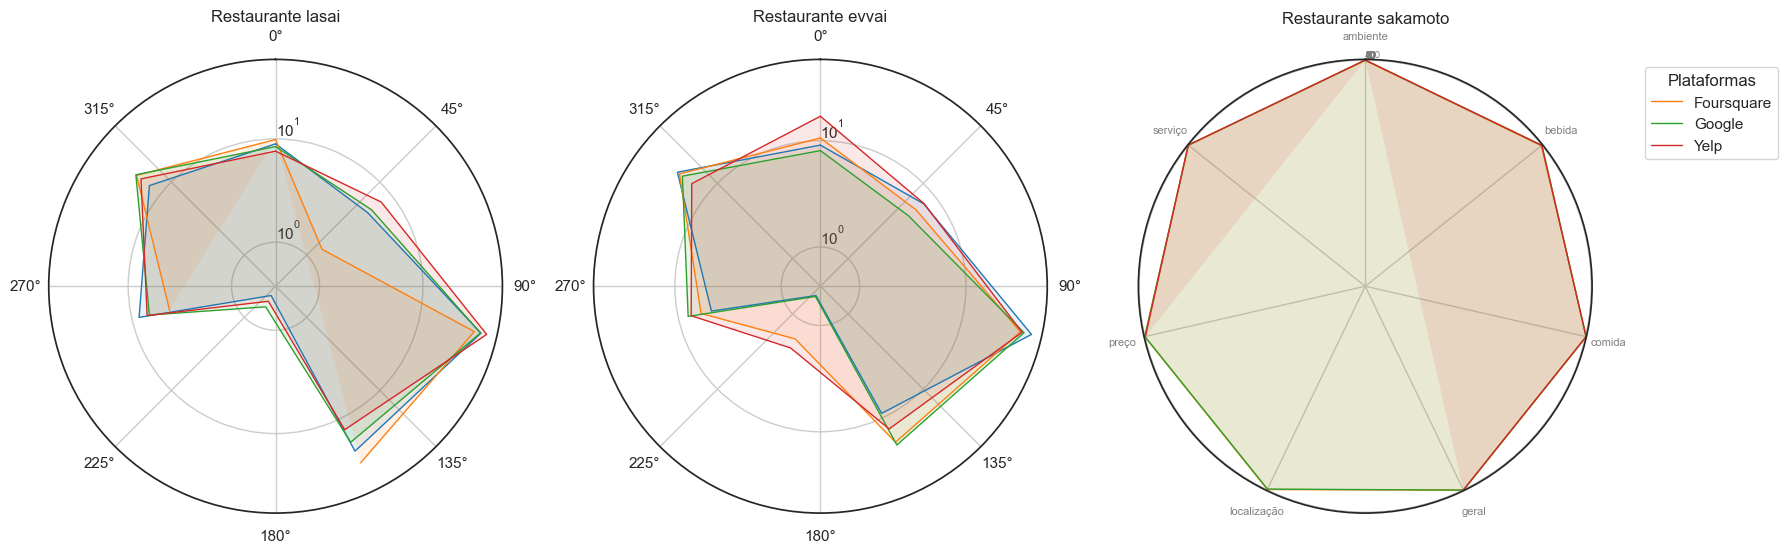

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def plot_radar_chart(ax, categories, values, label, color):
    N = len(categories)
    
    # Compute angle for each category
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Start plotting
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable and add labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rscale('log')
    ax.set_rlabel_position(0)
    plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ["10", "20", "30", "40", "50", "60", "70", "80", "90", "100"], color="grey", size=7)
    plt.ylim(0,100)

    # Plot data
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=label, color=color)
    ax.fill(angles, values, color, alpha=0.1)

# Define the restaurants to be analyzed
if name == 'teste1':
    restaurants = ['lasai', 'mani', 'mee']
else:
    restaurants = ['lasai', 'evvai', 'sakamoto']

# Define the categories
categories = ['ambiente', 'bebida', 'comida', 'geral', 'localização', 'preço', 'serviço']

# Define colors for platforms
platform_colors = {'Facebook': 'tab:blue', 'Foursquare': 'tab:orange', 'Google': 'tab:green', 'Yelp': 'tab:red'}

# Create a figure with a polar subplot for each restaurant
fig, axes = plt.subplots(1, 3, subplot_kw=dict(polar=True), figsize=(18, 6))

# Iterate over each restaurant
for i, rest in enumerate(restaurants):
    # Filter data by restaurant
    df_rest = df_results[df_results['restaurante_name'] == rest]

    # Group by 'platform' and sum the themes
    df_plat_rest = df_rest.groupby('platform')[categories].sum()

    # Add a column with the total number of themes
    df_plat_rest['total_temas'] = df_plat_rest.sum(axis=1)

    # Filter platforms based on percentage of comments
    porcent_limite_plataforma = 3

    # Calculate the number and percentage of comments per platform
    df_platform_counts = (df_rest.groupby(['restaurante_name', 'platform'])
                        .size()
                        .unstack(fill_value=0)
                        .stack()
                        .reset_index(level=1, name='total_comentarios')
                        .rename_axis(index='restaurante_name')
                        .reset_index(drop=True))
    total_geral = df_platform_counts['total_comentarios'].sum()
    df_platform_counts['total_comentarios_porcentagem'] = (df_platform_counts['total_comentarios'] / total_geral * 100).round(2)

    # Merge with df_plat_rest and filter platforms
    df_plat_rest = df_plat_rest.merge(df_platform_counts, on='platform')
    df_plat_rest = df_plat_rest[df_plat_rest['total_comentarios_porcentagem'] >= porcent_limite_plataforma]
    df_plat_rest = df_plat_rest.drop(['total_comentarios_porcentagem', 'total_comentarios'], axis=1)
    df_plat_rest = df_plat_rest.set_index('platform')

    # Calculate percentages
    df_plat_rest_porcent = df_plat_rest.div(df_plat_rest['total_temas'], axis=0)
    df_plat_rest_porcent = df_plat_rest_porcent * 100  # convert to percentage

    # Plot radar chart for each platform
    for platform in df_plat_rest_porcent.index:
        values = df_plat_rest_porcent.loc[platform, categories].values.tolist()
        plot_radar_chart(axes[i], categories, values, platform, color=platform_colors.get(platform, 'black'))

    # Add a title to each subplot
    axes[i].set_title(f'Restaurante {rest}')

# Add a single legend
plt.legend(title='Plataformas', bbox_to_anchor=(1.1, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

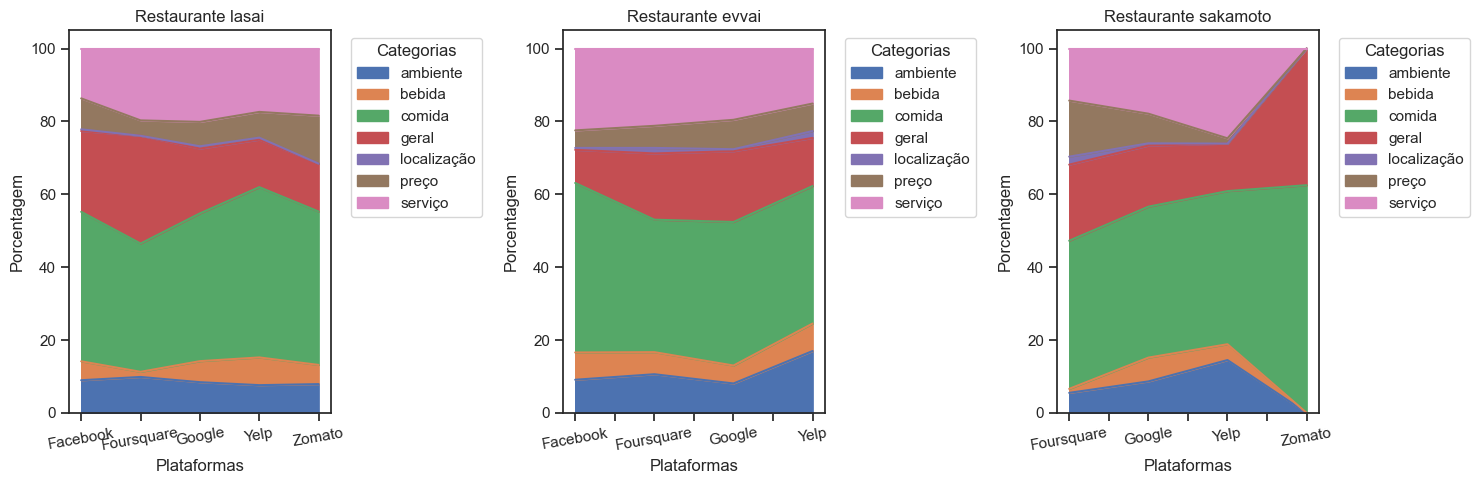

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponha que você tenha definido seus dados, incluindo df_results e temas

if name == 'teste1':
    restaurants = ['lasai', 'mani', 'mee']
else:
    restaurants = ['lasai', 'evvai', 'sakamoto']

# Definir o tamanho da figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Ajuste o tamanho conforme necessário

# Iterar sobre cada restaurante e criar um gráfico
for i, rest in enumerate(restaurants):
    # Filtrar dados pelo restaurante
    df_rest = df_results[df_results['restaurante_name'] == rest]

    # Agrupar por 'platform' e somar os temas
    df_plat_rest = df_rest.groupby('platform')[temas].sum()

    # Calcular porcentagens
    df_plat_rest_porcent = df_plat_rest.div(df_plat_rest.sum(axis=1), axis=0) * 100

    # Gráfico de Área Empilhada
    df_plat_rest_porcent.plot(kind='area', stacked=True, ax=axes[i])

    # Ajustes no gráfico
    axes[i].set_title(f'Restaurante {rest}')
    axes[i].set_xlabel('Plataformas')
    axes[i].set_ylabel('Porcentagem')
    axes[i].legend(title='Categorias', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=10)

# Ajustar layout
plt.tight_layout()
plt.show()


C:\Users\José Neto\AppData\Local\Temp\ipykernel_29300\326399119.py:26: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_plat_rest_porcent.T.plot(kind='pie', subplots=True, ax=axes[i], autopct='%1.1f%%', startangle=90)
C:\Users\José Neto\AppData\Local\Temp\ipykernel_29300\326399119.py:26: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_plat_rest_porcent.T.plot(kind='pie', subplots=True, ax=axes[i], autopct='%1.1f%%', startangle=90)
C:\Users\José Neto\AppData\Local\Temp\ipykernel_29300\326399119.py:26: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_plat_rest_porcent.T.plot(kind='pie', subplots=True, ax=axes[i], autopct='%1.1f%%', startangle=90)


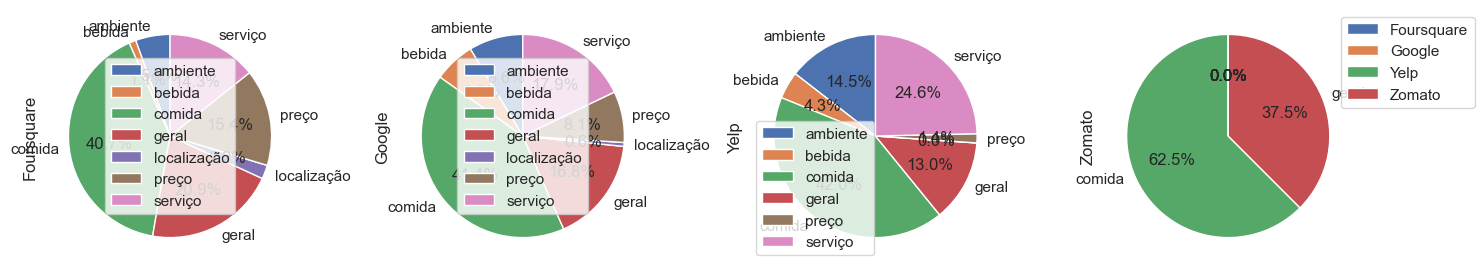

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponha que você tenha definido seus dados, incluindo df_results e temas

if name == 'teste1':
    restaurants = ['lasai', 'mani', 'mee']
else:
    restaurants = ['lasai', 'evvai', 'sakamoto']

# Definir o tamanho da figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Ajuste o tamanho conforme necessário

# Iterar sobre cada restaurante e criar um gráfico
for i, rest in enumerate(restaurants):
    # Filtrar dados pelo restaurante
    df_rest = df_results[df_results['restaurante_name'] == rest]

    # Agrupar por 'platform' e somar os temas
    df_plat_rest = df_rest.groupby('platform')[temas].sum()

    # Calcular porcentagens
    df_plat_rest_porcent = df_plat_rest.div(df_plat_rest.sum(axis=1), axis=0) * 100

    # Gráfico de Pizza
    df_plat_rest_porcent.T.plot(kind='pie', subplots=True, ax=axes[i], autopct='%1.1f%%', startangle=90)

    # Ajustes no gráfico
    axes[i].set_title(f'Restaurante {rest}')
    axes[i].set_ylabel('')

# Ajustar layout
plt.legend(df_plat_rest_porcent.index, loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

     platform  ambiente  bebida  comida  geral  localização  outros  preço  \
0    Facebook        19      11      87     47            1      28     18   
1  Foursquare         7       1      25     21            0       8      3   
2      Google        54      37     260    114            4      83     43   
3        Yelp        14      14      86     24            1      22     13   
4      Zomato         3       2      16      5            0       3      5   

   serviço  total_temas  total_comentarios  total_comentarios_porcentagem  
0       29          240                182                          19.16  
1       14           79                 54                           5.68  
2      129          724                540                          56.84  
3       32          206                149                          15.68  
4        7           41                 25                           2.63  


C:\Users\José Neto\AppData\Local\Temp\ipykernel_29300\2805225990.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f"{label}%" for label in plt.gca().get_yticks()])


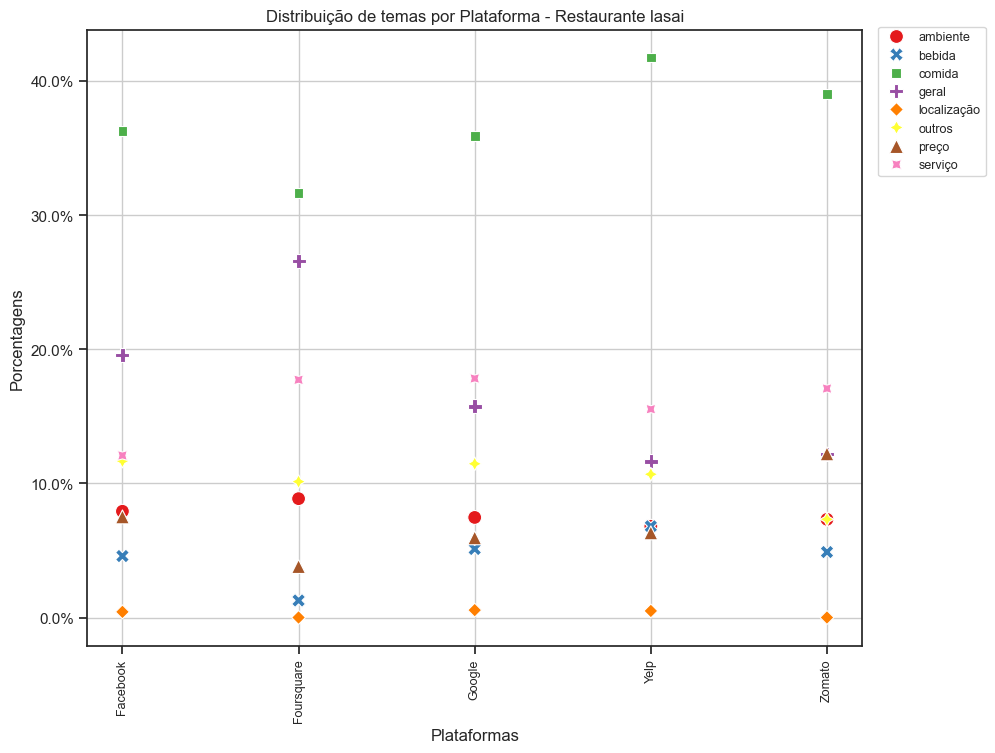

In [34]:
# Verificar valores brutos
rest = 'lasai'
df_rest = df_results[df_results['restaurante_name'] == rest]
df_plat_rest = df_rest.groupby('platform')[labels].sum()
df_plat_rest['total_temas'] = df_plat_rest.sum(axis=1)
df_platform_counts = (df_rest.groupby(['restaurante_name', 'platform'])
                    .size()
                    .unstack(fill_value=0)
                    .stack()
                    .reset_index(level=1, name='total_comentarios')
                    .rename_axis(index='restaurante_name')
                    .reset_index(drop=True))
total_geral = df_platform_counts['total_comentarios'].sum()
df_platform_counts['total_comentarios_porcentagem'] = (df_platform_counts['total_comentarios'] / total_geral * 100).round(2)
df_plat_rest = df_plat_rest.merge(df_platform_counts, on='platform')
print(df_plat_rest)

# Filtrar dados pelo restaurante
df_rest = df_results[df_results['restaurante_name'] == rest]

# Agrupar por 'platform' e somar os temas
df_plat_rest = df_rest.groupby('platform')[labels].sum()

# Adicionar coluna com o número total de temas
df_plat_rest['total_temas'] = df_plat_rest.sum(axis=1)

# Calcular porcentagens
df_plat_rest_porcent = df_plat_rest.div(df_plat_rest['total_temas'], axis=0)
df_plat_rest_porcent = df_plat_rest_porcent.map(lambda x: f"{x:.2%}" if x > 0 else x)

# Preservar a coluna 'platform' antes de resetar o índice
df_plat_rest_porcent.reset_index(inplace=True)

# Remover colunas desnecessárias e converter porcentagens para tipo numérico
df_grafico_rest = df_plat_rest_porcent.drop(['total_temas'], axis=1)
df_grafico_rest[labels] = df_grafico_rest[labels].apply(lambda x: x.str.rstrip('%').astype(float)).fillna(0)

# Criar o gráfico
sns.set(style='ticks')
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_grafico_rest, palette='Set1', s=100)
plt.title(f'Distribuição de temas por Plataforma - Restaurante {rest}')
plt.xlabel('Plataformas')
plt.ylabel('Porcentagens')
plt.xticks(ticks=range(len(df_grafico_rest)), labels=df_grafico_rest['platform'], rotation=90, fontsize=9)
plt.gca().set_yticklabels([f"{label}%" for label in plt.gca().get_yticks()])
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(1.09, 1.015), ncol=1, fontsize=9)
plt.show()

In [19]:
    # Gráfico Pontos
    # sns.scatterplot(data=df_grafico_rest, palette='Set1', s=100, ax=axes[i])
    # axes[i].set_title(f'Restaurante {rest}')
    # axes[i].set_xlabel('Plataformas')
    # axes[i].set_ylabel('Porcentagens')
    # axes[i].set_xticks(range(len(df_grafico_rest)))
    # axes[i].set_xticklabels(df_grafico_rest['platform'], rotation=90, fontsize=9)
    # axes[i].set_yticklabels([f"{label}%" for label in axes[i].get_yticks()])
    # axes[i].grid(True)
    # axes[i].legend(loc='upper center', bbox_to_anchor=(1.11, 1), ncol=1, fontsize=9)